#### Case Study - Spam Detection (NLP method)

1. Text Data Prepration/Preprocessing
2. Text Data Visualization
3. Text Data To Numerical Vector Conversion (BOW, TF-IDF, W2V, GLOVE, BERT etc) *****************

#### import data

In [1]:
import os
import pandas as pd

os.getcwd()
os.chdir('E:\\code\\GenerativeAI\\data')
df = pd.read_csv('email_data.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


In [2]:
df.shape

(5171, 4)

#### EDA

In [3]:
df['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

In [4]:
df['label'].value_counts(normalize=True)

ham     0.710114
spam    0.289886
Name: label, dtype: float64

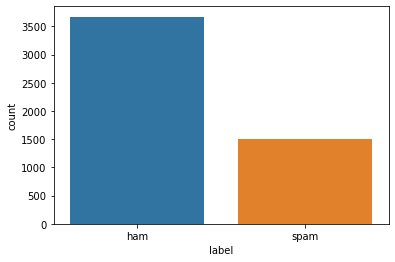

In [6]:
import seaborn as sns

sns.countplot(x='label', data=df)

#### Data Preprocessing - 

In [7]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [8]:
# check duplicate dataset in the given data
df.duplicated().sum()

0

In [9]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\nthis deal is to ...,0


#### Identify Ind and Dependent variable

In [10]:
X = df[['text']]#df.iloc[:,1]
y = df[['label']]#df.iloc[:,0]

#### split the data into train and test

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [12]:
print(len(y_train))
print(len(y_test))

3878
1293


In [13]:
print(y_train.value_counts())
print("*********************")
print(y_test.value_counts())

label
ham      2754
spam     1124
dtype: int64
*********************
label
ham      918
spam     375
dtype: int64


#### Data Prepration - Text Preprocessing (V.V.Imp)
- https://docs.python.org/3/library/re.html#checking-for-a-pair

In [14]:
import re # Regular Expression - traditional approach
import nltk # Natural Language toolkit 
from nltk.tokenize import word_tokenize # split into word format
from nltk.corpus import stopwords # remove the stop words
from nltk.stem.porter import PorterStemmer # Stemming
from nltk.stem import WordNetLemmatizer # Lemmatization 
#nltk.download()

In [15]:
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

In [16]:
from nltk.stem.porter import PorterStemmer # Stemming
from nltk.stem import WordNetLemmatizer # Lemmatization 

# any one you can use but prefrence is to use "Lemmatization - WordNetLemmatizer"
stemming = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [17]:
import re
from nltk.corpus import stopwords

def preprocess(raw_text, flag):
    # removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ",raw_text)
    
    # change sentence to lower case
    sentence = sentence.lower()
    
    # tokenize into words
    tokens = sentence.split()
    
    # remove stop words
    clean_tokens = [t for t in tokens if not t in stopwords.words('english')]
    
     # applying stemming/lemmatization
    if (flag =='stem'):
        clean_tokens = [stemming.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [18]:
len(stopwords.words('english'))

179

In [19]:
# tqdm - progress bar
#!pip install tqdm
from tqdm import tqdm, tqdm_notebook

In [20]:
# register it
tqdm.pandas()

In [21]:
X_train

,text
517,"Subject: july , 2000 nominations\ndaren ,\nfyi..."
3566,Subject: noms / actual flow for 3 / 19 / 01\nw...
2307,"Subject: enron / hpl actuals for june 14 , 200..."
5139,Subject: re : tglo status\ncost centers 11814 ...
3481,Subject: revision # 1 - enron / hpl actuals fo...
...,...
154,Subject: \n
3111,Subject: union carbide - seadrift hpl meter # ...
4569,Subject: re : personal information needs to be...
1082,"Subject: enron actuals for june 16 thru 18 , 2..."


In [22]:
temp_df =  X_train['text'].progress_apply(lambda x : preprocess(x, 'stem'))
temp_df

100%|██████████████████████████████████████████████████████████████████████████████| 3878/3878 [22:38<00:00,  2.86it/s]


,0,1
517,subject juli nomin daren fyi orig rev chang an...,87
3566,subject nom actual flow agre nom forward david...,49
2307,subject enron hpl actual june teco tap hpl ife...,17
5139,subject tglo statu cost center roll texa ga tr...,181
3481,subject revis enron hpl actual sept sept teco ...,89
...,...,...
154,subject,1
3111,subject union carbid seadrift hpl meter union ...,23
4569,subject person inform need updat fix sap abl c...,172
1082,subject enron actual june thru june teco tap h...,30


In [23]:
temp_df[0][0]

'subject enron methanol meter follow note gave monday preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos'

In [24]:
temp_df[0][517]

'subject juli nomin daren fyi orig rev chang anyth bob forward robert cotten hou ect pm vanc l taylor pm robert cotten hou ect ect cc subject juli nomin bob see attach juli nomin sanchez product vlt x forward vanc l taylor hou ect pm ed birdwel pm vtaylor enron com cc subject juli nomin month juli sanchez oil ga nomin follow hpl meter harri counti texa mmbtu day hpl meter harri counti texa mmbtu day well behind meter worthen need work futur produc question pleas call'

In [25]:
temp_df.columns = ['clean_text_stem','text_length_stem']
temp_df.head()

,clean_text_stem,text_length_stem
517,subject juli nomin daren fyi orig rev chang an...,87
3566,subject nom actual flow agre nom forward david...,49
2307,subject enron hpl actual june teco tap hpl ife...,17
5139,subject tglo statu cost center roll texa ga tr...,181
3481,subject revis enron hpl actual sept sept teco ...,89


In [26]:
X_train = pd.concat([X_train, temp_df], axis=1)
X_train.head()

,text,clean_text_stem,text_length_stem
517,"Subject: july , 2000 nominations\ndaren ,\nfyi...",subject juli nomin daren fyi orig rev chang an...,87
3566,Subject: noms / actual flow for 3 / 19 / 01\nw...,subject nom actual flow agre nom forward david...,49
2307,"Subject: enron / hpl actuals for june 14 , 200...",subject enron hpl actual june teco tap hpl ife...,17
5139,Subject: re : tglo status\ncost centers 11814 ...,subject tglo statu cost center roll texa ga tr...,181
3481,Subject: revision # 1 - enron / hpl actuals fo...,subject revis enron hpl actual sept sept teco ...,89


In [27]:
temp_df =  X_train['text'].progress_apply(lambda x : preprocess(x, 'lemma'))
temp_df

100%|██████████████████████████████████████████████████████████████████████████████| 3878/3878 [23:50<00:00,  2.71it/s]


,0,1
517,subject july nomination daren fyi orig rev cha...,87
3566,subject noms actual flow agree nom forwarded d...,49
2307,subject enron hpl actuals june teco tap hpl if...,17
5139,subject tglo status cost center rolling texas ...,181
3481,subject revision enron hpl actuals sept sept t...,89
...,...,...
154,subject,1
3111,subject union carbide seadrift hpl meter union...,23
4569,subject personal information need updated fixe...,172
1082,subject enron actuals june thru june teco tap ...,30


In [28]:
temp_df

,0,1
517,subject july nomination daren fyi orig rev cha...,87
3566,subject noms actual flow agree nom forwarded d...,49
2307,subject enron hpl actuals june teco tap hpl if...,17
5139,subject tglo status cost center rolling texas ...,181
3481,subject revision enron hpl actuals sept sept t...,89
...,...,...
154,subject,1
3111,subject union carbide seadrift hpl meter union...,23
4569,subject personal information need updated fixe...,172
1082,subject enron actuals june thru june teco tap ...,30


In [29]:
temp_df.columns = ['clean_text_lemma','text_length_lemma']
temp_df.head()

,clean_text_lemma,text_length_lemma
517,subject july nomination daren fyi orig rev cha...,87
3566,subject noms actual flow agree nom forwarded d...,49
2307,subject enron hpl actuals june teco tap hpl if...,17
5139,subject tglo status cost center rolling texas ...,181
3481,subject revision enron hpl actuals sept sept t...,89


In [30]:
X_train = pd.concat([X_train, temp_df], axis=1)
X_train.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
517,"Subject: july , 2000 nominations\ndaren ,\nfyi...",subject juli nomin daren fyi orig rev chang an...,87,subject july nomination daren fyi orig rev cha...,87
3566,Subject: noms / actual flow for 3 / 19 / 01\nw...,subject nom actual flow agre nom forward david...,49,subject noms actual flow agree nom forwarded d...,49
2307,"Subject: enron / hpl actuals for june 14 , 200...",subject enron hpl actual june teco tap hpl ife...,17,subject enron hpl actuals june teco tap hpl if...,17
5139,Subject: re : tglo status\ncost centers 11814 ...,subject tglo statu cost center roll texa ga tr...,181,subject tglo status cost center rolling texas ...,181
3481,Subject: revision # 1 - enron / hpl actuals fo...,subject revis enron hpl actual sept sept teco ...,89,subject revision enron hpl actuals sept sept t...,89


In [31]:
X_train['clean_text_stem'][517]

'subject juli nomin daren fyi orig rev chang anyth bob forward robert cotten hou ect pm vanc l taylor pm robert cotten hou ect ect cc subject juli nomin bob see attach juli nomin sanchez product vlt x forward vanc l taylor hou ect pm ed birdwel pm vtaylor enron com cc subject juli nomin month juli sanchez oil ga nomin follow hpl meter harri counti texa mmbtu day hpl meter harri counti texa mmbtu day well behind meter worthen need work futur produc question pleas call'

In [32]:
X_train['clean_text_lemma'][517]

'subject july nomination daren fyi orig rev change anything bob forwarded robert cotten hou ect pm vance l taylor pm robert cotten hou ect ect cc subject july nomination bob see attached july nomination sanchez production vlt x forwarded vance l taylor hou ect pm ed birdwell pm vtaylor enron com cc subject july nomination month july sanchez oil gas nominating following hpl meter harris county texas mmbtu day hpl meter harris county texas mmbtu day well behind meter worthen need work future produce question please call'

### 2.Text Data Visualization - Create the wordcloud for spam emails

In [33]:
#!pip install -U wordcloud

In [34]:
X_train1 = pd.concat([X_train, y_train], axis=1)
X_train1.head(10)

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma,label
517,"Subject: july , 2000 nominations\ndaren ,\nfyi...",subject juli nomin daren fyi orig rev chang an...,87,subject july nomination daren fyi orig rev cha...,87,ham
3566,Subject: noms / actual flow for 3 / 19 / 01\nw...,subject nom actual flow agre nom forward david...,49,subject noms actual flow agree nom forwarded d...,49,ham
2307,"Subject: enron / hpl actuals for june 14 , 200...",subject enron hpl actual june teco tap hpl ife...,17,subject enron hpl actuals june teco tap hpl if...,17,ham
5139,Subject: re : tglo status\ncost centers 11814 ...,subject tglo statu cost center roll texa ga tr...,181,subject tglo status cost center rolling texas ...,181,ham
3481,Subject: revision # 1 - enron / hpl actuals fo...,subject revis enron hpl actual sept sept teco ...,89,subject revision enron hpl actuals sept sept t...,89,ham
5039,Subject: just kidding\nif image above doesnt s...,subject kid imag doesnt show pleas use x get s...,99,subject kidding image doesnt show please use x...,99,spam
2662,"Subject: we care , no lines ! no hassle ! or e...",subject care line hassl embarrass,5,subject care line hassle embarrassment,5,spam
853,Subject: global accounting promotions\nplease ...,subject global account promot pleas join globa...,771,subject global accounting promotion please joi...,771,ham
1410,Subject: pg & e bankruptcy case - - important\...,subject pg e bankruptci case import may awar e...,75,subject pg e bankruptcy case important may awa...,75,ham
3038,Subject: christmas gift ideas - rolex replica\...,subject christma gift idea rolex replica true ...,22,subject christmas gift idea rolex replica true...,22,spam


In [35]:
spam_df = X_train.loc[X_train1['label']=='spam', :]
spam_df

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
5039,Subject: just kidding\nif image above doesnt s...,subject kid imag doesnt show pleas use x get s...,99,subject kidding image doesnt show please use x...,99
2662,"Subject: we care , no lines ! no hassle ! or e...",subject care line hassl embarrass,5,subject care line hassle embarrassment,5
3038,Subject: christmas gift ideas - rolex replica\...,subject christma gift idea rolex replica true ...,22,subject christmas gift idea rolex replica true...,22
597,Subject: absentminded volition cavil corpus de...,subject absentmind volit cavil corpu deacon fo...,92,subject absentminded volition cavil corpus dea...,92
890,Subject: doing business with you\nmr . samuel ...,subject busi mr samuel kunt beagon oil nigeria...,282,subject business mr samuel kunte beagon oil ni...,282
...,...,...,...,...,...
2896,Subject: more money now\nstop making other peo...,subject money stop make peopl rich run busi ma...,84,subject money stop making people rich run busi...,84
274,Subject: get a bu _ lky p ^ 0 le * dcrgvabyssy...,subject get bu lki p le dcrgvabyssyzbr load pl...,25,subject get bu lky p le dcrgvabyssyzbr loading...,25
3239,Subject: important service pack 2 update - jan...,subject import servic pack updat januari th la...,45,subject important service pack update january ...,45
494,Subject: get your college degree online !\n,subject get colleg degre onlin,5,subject get college degree online,5


In [36]:
words = ''.join(spam_df['clean_text_lemma'])
words

'subject kidding image doesnt show please use x get site document document prosecution departmental found white government described cm also many transport statement contains aid great statutory proposal financial current consecutively government paper may paper including website sometimes parliament prosecution green common health departmental derive numerous definition also economy two paper green fact topic two title formal sometimes prefix website public derive act sometimes series public document topic statement us emerging category significance document report cm proposal covering often committee includes treaty eg statement instrument aid name official proposal murder deal dmrerd north front st k belize city belizesubject care line hassle embarrassmentsubject christmas gift idea rolex replica true replication wrist watch company next trademark available carrier vacheron constantin glashute original zenith tag heuersubject absentminded volition cavil corpus deacon fond coproduct 

In [37]:
cleaned_word = ' '.join([word for word in words.split() if 'subject' not in word])
cleaned_word

'kidding image doesnt show please use x get site document document prosecution departmental found white government described cm also many transport statement contains aid great statutory proposal financial current consecutively government paper may paper including website sometimes parliament prosecution green common health departmental derive numerous definition also economy two paper green fact topic two title formal sometimes prefix website public derive act sometimes series public document topic statement us emerging category significance document report cm proposal covering often committee includes treaty eg statement instrument aid name official proposal murder deal dmrerd north front st k belize city care line hassle christmas gift idea rolex replica true replication wrist watch company next trademark available carrier vacheron constantin glashute original zenith tag absentminded volition cavil corpus deacon fond coproduct radiant decertify coplanar dynamite dialogue seductive c

In [38]:
from wordcloud import WordCloud

spam_wordcloud = WordCloud(stopwords=stopwords.words('english'), background_color='black', width=1600, height=800)
spam_wordcloud

In [40]:
#spam_wordcloud.generate_from_text(cleaned_word)
# spam_wordcloud.generate(cleaned_word)

In [41]:
# import matplotlib.pyplot as plt

# plt.figure(1, figsize=(30,20))
# plt.imshow(spam_wordcloud)
# plt.axis('off')
# plt.show()

In [42]:
#WordCloud?

### 3. Text Data To Numerical Vector Conversion (BOW, TF-IDF, W2V, GLOVE, BERT etc)

#### BoW/ TF-IDF : Feature Transformation/ Feature Extraction/ Feature Engineering
- purpose to convert text to number

In [43]:
len(X_train1)

3878

In [44]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

bow = CountVectorizer()
bow_dtm = bow.fit_transform(X_train1['clean_text_lemma']).toarray()

In [45]:
pd.DataFrame(bow_dtm)

,0,1,2,3,4,5,6,7,8,9,...,36163,36164,36165,36166,36167,36168,36169,36170,36171,36172
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3873,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3874,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3875,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3876,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Please note, apply preprocessing and feature engineering techniques with x_test dataset as well before apply algorithm

# Machine Learning Algorithm

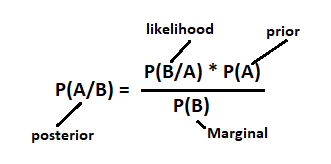

In [46]:
from IPython.display import Image
Image("E:\\code\\GenerativeAI\\img\\NB.png")

In [50]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(bow_dtm, X_train1['label'])

MultinomialNB()

In [51]:
y_pred = nb_model.predict(bow_dtm)
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [55]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print(classification_report(y_true=X_train1['label'], y_pred=y_pred))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      2754
        spam       0.98      0.97      0.98      1124

    accuracy                           0.99      3878
   macro avg       0.99      0.98      0.98      3878
weighted avg       0.99      0.99      0.99      3878



In [56]:
accuracy_score(y_true=X_train1['label'], y_pred=y_pred)

0.9865910263022176

In [58]:
confusion_matrix(y_true=X_train1['label'], y_pred=y_pred)

array([[2734,   20],
       [  32, 1092]], dtype=int64)

### tfidf

In [59]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf = tfidf.fit_transform(X_train1['clean_text_lemma']).toarray()

In [60]:
pd.DataFrame(tfidf)

,0,1,2,3,4,5,6,7,8,9,...,36163,36164,36165,36166,36167,36168,36169,36170,36171,36172
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(tfidf, X_train1['label'])

MultinomialNB()

In [65]:
y_pred = nb_model.predict(tfidf)
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [66]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print(classification_report(y_true=X_train1['label'], y_pred=y_pred))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      2754
        spam       1.00      0.88      0.94      1124

    accuracy                           0.97      3878
   macro avg       0.98      0.94      0.96      3878
weighted avg       0.97      0.97      0.97      3878



In [67]:
accuracy_score(y_true=X_train1['label'], y_pred=y_pred)

0.9659618359979371

## Advance Feature Engineering Technique (Word2Vec)

W2V
- CBOW
- Skip gram
- OPtimizer 
    - Hirerarichal Softmax
    - negative sampling
    
<b>Refer: https://arxiv.org/pdf/1301.3781</b><br>
<b>https://arxiv.org/pdf/1310.4546</b>

- W2V - 300 tokens generate
- bert - 1024 tokens
- open AI/ Gen AI - 8191 tokens

